In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# !pip install ta

In [5]:
import ta

In [6]:
ta.__doc__

'It is a Technical Analysis library useful to do feature\nengineering from financial time series datasets (Open,\nClose, High, Low, Volume). It is built on Pandas and Numpy.\n\n.. moduleauthor:: Dario Lopez Padial (Bukosabino)\n\n'

## Today is Monday
* Today's close must be lower than yesterdays's close.
* Friday's close must be lower than thursday's close
* If all the above conditions are met, go long at the close on monday.<br>
* <i>Sell at the close when today's close is higher than than yesterday's high.

In [7]:
# import the data
df = pd.read_csv('EURUSD_D1.csv');
df.head(20)

,Date,Open,High,Low,Close,Vol
0,25/08/2008 00:00,1.47857,1.48067,1.47185,1.47242,342594
1,26/08/2008 00:00,1.47250,1.47269,1.45655,1.46429,862105
2,27/08/2008 00:00,1.46437,1.47761,1.46419,1.47430,863758
3,28/08/2008 00:00,1.47462,1.48103,1.46691,1.47013,866737
4,29/08/2008 00:00,1.47026,1.47674,1.46368,1.46714,828348
5,31/08/2008 00:00,1.46748,1.47198,1.46748,1.46967,33247
6,01/09/2008 00:00,1.46962,1.47029,1.45543,1.45810,864080
7,02/09/2008 00:00,1.45808,1.45981,1.44626,1.44873,863699
8,03/09/2008 00:00,1.44866,1.45219,1.43811,1.45129,865385
9,04/09/2008 00:00,1.45134,1.45438,1.42108,1.42572,858696


In [8]:
df.tail(20)

,Date,Open,High,Low,Close,Vol
4994,12/08/2024 00:00,1.09125,1.09393,1.09116,1.09361,150355
4995,13/08/2024 00:00,1.09360,1.09996,1.09137,1.09959,181942
4996,14/08/2024 00:00,1.09958,1.10473,1.09863,1.10116,228917
4997,15/08/2024 00:00,1.10117,1.10154,1.09495,1.09723,180963
4998,16/08/2024 00:00,1.09723,1.10296,1.09718,1.10211,142237
4999,18/08/2024 00:00,1.10265,1.10340,1.10227,1.10246,7463
5000,19/08/2024 00:00,1.10246,1.10875,1.10231,1.10854,203566
5001,20/08/2024 00:00,1.10855,1.11317,1.10719,1.11275,284696
5002,21/08/2024 00:00,1.11274,1.11740,1.10992,1.11548,178185
5003,22/08/2024 00:00,1.11549,1.11646,1.10980,1.11160,132171


In [9]:
# use bokeh to plot draggable charts
df.Close

0       1.47242
1       1.46429
2       1.47430
3       1.47013
4       1.46714
         ...   
5009    1.10800
5010    1.10456
5011    1.10446
5012    1.10670
5013    1.10560
Name: Close, Length: 5014, dtype: float64

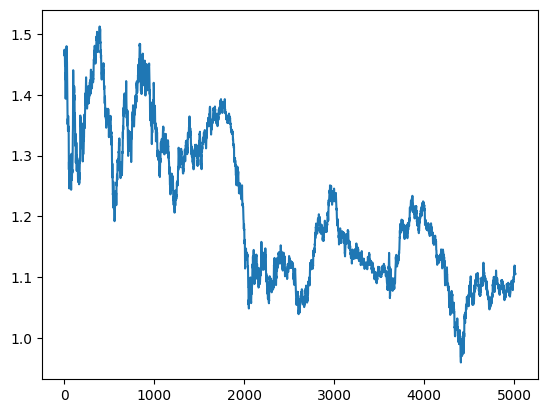

In [10]:
plt.plot(df['Close'])
plt.show()

In [12]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.io import output_notebook

# This line makes sure the output is displayed in Jupyter notebooks
output_notebook()

source = ColumnDataSource(df)

# Create a new plot with a title and axis labels
p = figure(title="Interactive Close Price Chart",
           x_axis_label='Date', y_axis_label='Close Price',
           x_axis_type='datetime', tools="pan,wheel_zoom,box_zoom,reset,save")

# Add a line renderer with legend and line thickness
p.line('index', 'Close', source=source, line_width=2, legend_label='Close')

# Show the results
show(p)


## A closer look into the data `EDA`

In [13]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Vol'], dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5014 entries, 0 to 5013
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5014 non-null   object 
 1   Open    5014 non-null   float64
 2   High    5014 non-null   float64
 3   Low     5014 non-null   float64
 4   Close   5014 non-null   float64
 5   Vol     5014 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 235.2+ KB


In [15]:
df.head(10)

,Date,Open,High,Low,Close,Vol
0,25/08/2008 00:00,1.47857,1.48067,1.47185,1.47242,342594
1,26/08/2008 00:00,1.47250,1.47269,1.45655,1.46429,862105
2,27/08/2008 00:00,1.46437,1.47761,1.46419,1.47430,863758
3,28/08/2008 00:00,1.47462,1.48103,1.46691,1.47013,866737
4,29/08/2008 00:00,1.47026,1.47674,1.46368,1.46714,828348
5,31/08/2008 00:00,1.46748,1.47198,1.46748,1.46967,33247
6,01/09/2008 00:00,1.46962,1.47029,1.45543,1.45810,864080
7,02/09/2008 00:00,1.45808,1.45981,1.44626,1.44873,863699
8,03/09/2008 00:00,1.44866,1.45219,1.43811,1.45129,865385
9,04/09/2008 00:00,1.45134,1.45438,1.42108,1.42572,858696


In [16]:
## Determine which day it is
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y %H:%M')
df.head()

,Date,Open,High,Low,Close,Vol
0,2008-08-25,1.47857,1.48067,1.47185,1.47242,342594
1,2008-08-26,1.47250,1.47269,1.45655,1.46429,862105
2,2008-08-27,1.46437,1.47761,1.46419,1.47430,863758
3,2008-08-28,1.47462,1.48103,1.46691,1.47013,866737
4,2008-08-29,1.47026,1.47674,1.46368,1.46714,828348


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5014 entries, 0 to 5013
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5014 non-null   datetime64[ns]
 1   Open    5014 non-null   float64       
 2   High    5014 non-null   float64       
 3   Low     5014 non-null   float64       
 4   Close   5014 non-null   float64       
 5   Vol     5014 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 235.2 KB


## Extract the day of the week using this `df['Date'].dt.day_name()`
<i>The dt accessor is a built-in feature of pandas and doesn't require separate definition. It only becomes available when you have a datetime-like Series</i>

In [18]:
df['Date'].dt.day_name().head(30)

0        Monday
1       Tuesday
2     Wednesday
3      Thursday
4        Friday
5        Sunday
6        Monday
7       Tuesday
8     Wednesday
9      Thursday
10       Friday
11       Sunday
12       Monday
13      Tuesday
14    Wednesday
15     Thursday
16       Friday
17       Sunday
18       Monday
19      Tuesday
20    Wednesday
21     Thursday
22       Friday
23       Sunday
24       Monday
25      Tuesday
26    Wednesday
27     Thursday
28       Friday
29       Sunday
Name: Date, dtype: object

In [19]:
df['Day'] = df['Date'].dt.day_name()
# del df['Vol']
df.head()

,Date,Open,High,Low,Close,Vol,Day
0,2008-08-25,1.47857,1.48067,1.47185,1.47242,342594,Monday
1,2008-08-26,1.47250,1.47269,1.45655,1.46429,862105,Tuesday
2,2008-08-27,1.46437,1.47761,1.46419,1.47430,863758,Wednesday
3,2008-08-28,1.47462,1.48103,1.46691,1.47013,866737,Thursday
4,2008-08-29,1.47026,1.47674,1.46368,1.46714,828348,Friday


In [20]:
df.head(20)

,Date,Open,High,Low,Close,Vol,Day
0,2008-08-25,1.47857,1.48067,1.47185,1.47242,342594,Monday
1,2008-08-26,1.47250,1.47269,1.45655,1.46429,862105,Tuesday
2,2008-08-27,1.46437,1.47761,1.46419,1.47430,863758,Wednesday
3,2008-08-28,1.47462,1.48103,1.46691,1.47013,866737,Thursday
4,2008-08-29,1.47026,1.47674,1.46368,1.46714,828348,Friday
5,2008-08-31,1.46748,1.47198,1.46748,1.46967,33247,Sunday
6,2008-09-01,1.46962,1.47029,1.45543,1.45810,864080,Monday
7,2008-09-02,1.45808,1.45981,1.44626,1.44873,863699,Tuesday
8,2008-09-03,1.44866,1.45219,1.43811,1.45129,865385,Wednesday
9,2008-09-04,1.45134,1.45438,1.42108,1.42572,858696,Thursday


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5014 entries, 0 to 5013
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5014 non-null   datetime64[ns]
 1   Open    5014 non-null   float64       
 2   High    5014 non-null   float64       
 3   Low     5014 non-null   float64       
 4   Close   5014 non-null   float64       
 5   Vol     5014 non-null   int64         
 6   Day     5014 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 274.3+ KB


## Conversion of days into int datatype
* monday  = 1
* tuesday = 2
* wednesday = 3
* Thursday = 4
* Friday = 5
* Sunday = 0

In [22]:
df['date_index'] = np.where(df['Day'] == 'Monday', 1,
         np.where(df['Day'] == 'Tuesday', 2,
                  np.where(df['Day'] == 'Wednesday', 3,
                           np.where(df['Day'] == 'Thursday', 4,
                                    np.where(df['Day'] == 'Friday', 5, 0)))))
df.head()

,Date,Open,High,Low,Close,Vol,Day,date_index
0,2008-08-25,1.47857,1.48067,1.47185,1.47242,342594,Monday,1
1,2008-08-26,1.47250,1.47269,1.45655,1.46429,862105,Tuesday,2
2,2008-08-27,1.46437,1.47761,1.46419,1.47430,863758,Wednesday,3
3,2008-08-28,1.47462,1.48103,1.46691,1.47013,866737,Thursday,4
4,2008-08-29,1.47026,1.47674,1.46368,1.46714,828348,Friday,5


In [23]:
df.head(20)

,Date,Open,High,Low,Close,Vol,Day,date_index
0,2008-08-25,1.47857,1.48067,1.47185,1.47242,342594,Monday,1
1,2008-08-26,1.47250,1.47269,1.45655,1.46429,862105,Tuesday,2
2,2008-08-27,1.46437,1.47761,1.46419,1.47430,863758,Wednesday,3
3,2008-08-28,1.47462,1.48103,1.46691,1.47013,866737,Thursday,4
4,2008-08-29,1.47026,1.47674,1.46368,1.46714,828348,Friday,5
5,2008-08-31,1.46748,1.47198,1.46748,1.46967,33247,Sunday,0
6,2008-09-01,1.46962,1.47029,1.45543,1.45810,864080,Monday,1
7,2008-09-02,1.45808,1.45981,1.44626,1.44873,863699,Tuesday,2
8,2008-09-03,1.44866,1.45219,1.43811,1.45129,865385,Wednesday,3
9,2008-09-04,1.45134,1.45438,1.42108,1.42572,858696,Thursday,4


In [24]:
signal = np.where((df['date_index'] == 1) &
                        (df['Close'] < df['Close'].shift(2))
                        & (df['Close'].shift(2) < df['Close'].shift(3)), 1, 0)
signal

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
(signal == 1).sum(), (signal == 0).sum()

(193, 4821)

In [32]:
df['signal'] = signal
df.head(20)

,Date,Open,High,Low,Close,Vol,Day,date_index,signal
0,2008-08-25,1.47857,1.48067,1.47185,1.47242,342594,Monday,1,0
1,2008-08-26,1.47250,1.47269,1.45655,1.46429,862105,Tuesday,2,0
2,2008-08-27,1.46437,1.47761,1.46419,1.47430,863758,Wednesday,3,0
3,2008-08-28,1.47462,1.48103,1.46691,1.47013,866737,Thursday,4,0
4,2008-08-29,1.47026,1.47674,1.46368,1.46714,828348,Friday,5,0
5,2008-08-31,1.46748,1.47198,1.46748,1.46967,33247,Sunday,0,0
6,2008-09-01,1.46962,1.47029,1.45543,1.45810,864080,Monday,1,1
7,2008-09-02,1.45808,1.45981,1.44626,1.44873,863699,Tuesday,2,0
8,2008-09-03,1.44866,1.45219,1.43811,1.45129,865385,Wednesday,3,0
9,2008-09-04,1.45134,1.45438,1.42108,1.42572,858696,Thursday,4,0


In [36]:
signal_positions = df[df['signal'] == 1]

In [37]:
signal_positions

,Date,Open,High,Low,Close,Vol,Day,date_index,signal
6,2008-09-01,1.46962,1.47029,1.45543,1.45810,864080,Monday,1,1
30,2008-09-29,1.45356,1.45675,1.43001,1.43655,1723532,Monday,1,1
36,2008-10-06,1.36490,1.36700,1.34430,1.35150,1128980,Monday,1,1
48,2008-10-20,1.34435,1.35299,1.32871,1.33373,712195,Monday,1,1
54,2008-10-27,1.26219,1.26774,1.23331,1.24602,1427687,Monday,1,1
...,...,...,...,...,...,...,...,...,...
4862,2024-03-11,1.09427,1.09480,1.09145,1.09304,177769,Monday,1,1
4880,2024-04-01,1.07932,1.07987,1.07309,1.07372,128429,Monday,1,1
4892,2024-04-15,1.06461,1.06651,1.06202,1.06247,229855,Monday,1,1
4922,2024-05-20,1.08725,1.08844,1.08540,1.08602,110144,Monday,1,1


In [39]:
df[40:80]

,Date,Open,High,Low,Close,Vol,Day,date_index,signal
40,2008-10-10,1.35567,1.36407,1.32592,1.34091,131567,Friday,5,0
41,2008-10-12,1.35653,1.36181,1.35412,1.35955,47262,Sunday,0,0
42,2008-10-13,1.35969,1.36795,1.34498,1.36528,174755,Monday,1,0
43,2008-10-14,1.36540,1.37639,1.35585,1.35616,172587,Tuesday,2,0
44,2008-10-15,1.35583,1.36847,1.34210,1.34334,173138,Wednesday,3,0
45,2008-10-16,1.34333,1.35329,1.33467,1.34835,174898,Thursday,4,0
46,2008-10-17,1.34814,1.35116,1.33846,1.34052,165659,Friday,5,0
47,2008-10-19,1.34216,1.34437,1.33917,1.34418,92839,Sunday,0,0
48,2008-10-20,1.34435,1.35299,1.32871,1.33373,712195,Monday,1,1
49,2008-10-21,1.33380,1.33514,1.29995,1.30052,712153,Tuesday,2,0


In [43]:
signal_positions[:60]

,Date,Open,High,Low,Close,Vol,Day,date_index,signal
6,2008-09-01,1.46962,1.47029,1.45543,1.45810,864080,Monday,1,1
30,2008-09-29,1.45356,1.45675,1.43001,1.43655,1723532,Monday,1,1
36,2008-10-06,1.36490,1.36700,1.34430,1.35150,1128980,Monday,1,1
48,2008-10-20,1.34435,1.35299,1.32871,1.33373,712195,Monday,1,1
54,2008-10-27,1.26219,1.26774,1.23331,1.24602,1427687,Monday,1,1
60,2008-11-03,1.27725,1.28985,1.25750,1.26135,724719,Monday,1,1
84,2008-12-01,1.26670,1.27035,1.25810,1.25960,748090,Monday,1,1
114,2009-01-05,1.39575,1.39610,1.35495,1.36365,547398,Monday,1,1
120,2009-01-12,1.34160,1.34455,1.32938,1.33570,608034,Monday,1,1
150,2009-02-16,1.27905,1.28245,1.27265,1.27970,550854,Monday,1,1


In [44]:
# calculate the average for the next four days so that monday would have the average of the next four days as it's value


In [45]:
next_values = ta.trend.sma_indicator(df['Close'], window=4)
next_values

0            NaN
1            NaN
2            NaN
3       1.470285
4       1.468965
          ...   
5009    1.113643
5010    1.110673
5011    1.107365
5012    1.105930
5013    1.105330
Name: sma_4, Length: 5014, dtype: float64

In [47]:
df = df.assign(next_values=next_values);
df

,Date,Open,High,Low,Close,Day,date_index,signal,next_values
0,2008-08-25,1.47857,1.48067,1.47185,1.47242,Monday,1,0,NaN
1,2008-08-26,1.47250,1.47269,1.45655,1.46429,Tuesday,2,0,NaN
2,2008-08-27,1.46437,1.47761,1.46419,1.47430,Wednesday,3,0,NaN
3,2008-08-28,1.47462,1.48103,1.46691,1.47013,Thursday,4,0,1.470285
4,2008-08-29,1.47026,1.47674,1.46368,1.46714,Friday,5,0,1.468965
...,...,...,...,...,...,...,...,...,...
5009,2024-08-29,1.11245,1.11399,1.10556,1.10800,Thursday,4,0,1.113643
5010,2024-08-30,1.10802,1.10950,1.10438,1.10456,Friday,5,0,1.110673
5011,2024-09-01,1.10462,1.10496,1.10440,1.10446,Sunday,0,0,1.107365
5012,2024-09-02,1.10445,1.10773,1.10419,1.10670,Monday,1,0,1.105930


In [48]:
df[:50]

,Date,Open,High,Low,Close,Day,date_index,signal,next_values
0,2008-08-25,1.47857,1.48067,1.47185,1.47242,Monday,1,0,NaN
1,2008-08-26,1.47250,1.47269,1.45655,1.46429,Tuesday,2,0,NaN
2,2008-08-27,1.46437,1.47761,1.46419,1.47430,Wednesday,3,0,NaN
3,2008-08-28,1.47462,1.48103,1.46691,1.47013,Thursday,4,0,1.470285
4,2008-08-29,1.47026,1.47674,1.46368,1.46714,Friday,5,0,1.468965
5,2008-08-31,1.46748,1.47198,1.46748,1.46967,Sunday,0,0,1.470310
6,2008-09-01,1.46962,1.47029,1.45543,1.45810,Monday,1,1,1.466260
7,2008-09-02,1.45808,1.45981,1.44626,1.44873,Tuesday,2,0,1.460910
8,2008-09-03,1.44866,1.45219,1.43811,1.45129,Wednesday,3,0,1.456948
9,2008-09-04,1.45134,1.45438,1.42108,1.42572,Thursday,4,0,1.445960


In [52]:
compare_price = df['next_values'].shift(-4)
df = df.assign(compare_price=compare_price);
df[:50]

,Date,Open,High,Low,Close,Day,date_index,signal,next_values,compare_price
0,2008-08-25,1.47857,1.48067,1.47185,1.47242,Monday,1,0,NaN,1.468965
1,2008-08-26,1.47250,1.47269,1.45655,1.46429,Tuesday,2,0,NaN,1.470310
2,2008-08-27,1.46437,1.47761,1.46419,1.47430,Wednesday,3,0,NaN,1.466260
3,2008-08-28,1.47462,1.48103,1.46691,1.47013,Thursday,4,0,1.470285,1.460910
4,2008-08-29,1.47026,1.47674,1.46368,1.46714,Friday,5,0,1.468965,1.456948
5,2008-08-31,1.46748,1.47198,1.46748,1.46967,Sunday,0,0,1.470310,1.445960
6,2008-09-01,1.46962,1.47029,1.45543,1.45810,Monday,1,1,1.466260,1.438100
7,2008-09-02,1.45808,1.45981,1.44626,1.44873,Tuesday,2,0,1.460910,1.434728
8,2008-09-03,1.44866,1.45219,1.43811,1.45129,Wednesday,3,0,1.456948,1.425230
9,2008-09-04,1.45134,1.45438,1.42108,1.42572,Thursday,4,0,1.445960,1.421098


In [53]:
df[-50:]

,Date,Open,High,Low,Close,Day,date_index,signal,next_values,compare_price
4964,2024-07-08,1.08255,1.08450,1.08146,1.08305,Monday,1,0,1.082585,1.085672
4965,2024-07-09,1.08307,1.08333,1.08054,1.08142,Tuesday,2,0,1.082682,1.087457
4966,2024-07-10,1.08142,1.08365,1.08108,1.08333,Wednesday,3,0,1.082590,1.089077
4967,2024-07-11,1.08332,1.08999,1.08322,1.08740,Thursday,4,0,1.083800,1.089778
4968,2024-07-12,1.08740,1.09113,1.08617,1.09054,Friday,5,0,1.085672,1.090647
4969,2024-07-14,1.08852,1.08950,1.08818,1.08856,Sunday,0,0,1.087457,1.091015
4970,2024-07-15,1.08857,1.09222,1.08833,1.08981,Monday,1,0,1.089077,1.090510
4971,2024-07-16,1.08980,1.09054,1.08715,1.09020,Tuesday,2,0,1.089778,1.090430
4972,2024-07-17,1.09019,1.09480,1.08950,1.09402,Wednesday,3,0,1.090647,1.089147
4973,2024-07-18,1.09402,1.09407,1.08935,1.09003,Thursday,4,0,1.091015,1.087880


Now we have indentified the days that the market satisfies our conditions, let's also identify the days where the market suffers

In [56]:
(signal == 0).sum(), (signal==1).sum() # we have 193 trade

(4821, 193)

In [101]:
evaluate = np.where((df['Close'] < df['compare_price']) & (df['signal'] == 1), 1,
            np.where((df['Close'] > df['compare_price']) & (df['signal'] == 1), 2, 0))

df = df.assign(evaluate=evaluate)

evaluate

array([0, 0, 0, ..., 0, 0, 0])

In [76]:
(evaluate == 1).sum(), (evaluate == 2).sum()

(101, 92)

In [77]:
total_signal = (signal==1).sum()
total_evaluate = (evaluate == 1).sum()

In [78]:
percentage_profit = total_evaluate / total_signal * 100
percentage_profit

52.331606217616574

In [79]:
df['lost_signals'] = np.where(df['evaluate'] == 2, 1, 0)
df['lost_signals']

0       0
1       0
2       0
3       0
4       0
       ..
5009    0
5010    0
5011    0
5012    0
5013    0
Name: lost_signals, Length: 5014, dtype: int64

In [86]:
lost_trades = (df['lost_signals']==1)

In [88]:
correct = df[lost_trades].copy()
correct

,Date,Open,High,Low,Close,Day,date_index,signal,next_values,compare_price,evaluate,lost_signals
6,2008-09-01,1.46962,1.47029,1.45543,1.45810,Monday,1,1,1.466260,1.438100,2,1
30,2008-09-29,1.45356,1.45675,1.43001,1.43655,Monday,1,1,1.454360,1.391620,2,1
48,2008-10-20,1.34435,1.35299,1.32871,1.33373,Monday,1,1,1.341695,1.282305,2,1
114,2009-01-05,1.39575,1.39610,1.35495,1.36365,Monday,1,1,1.387747,1.357030,2,1
120,2009-01-12,1.34160,1.34455,1.32938,1.33570,Monday,1,1,1.348393,1.320812,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4802,2024-01-01,1.10427,1.10447,1.10356,1.10365,Monday,1,1,1.106245,1.093820,2,1
4814,2024-01-15,1.09451,1.09675,1.09335,1.09449,Monday,1,1,1.095518,1.088507,2,1
4862,2024-03-11,1.09427,1.09480,1.09145,1.09304,Monday,1,1,1.093967,1.091232,2,1
4922,2024-05-20,1.08725,1.08844,1.08540,1.08602,Monday,1,1,1.086693,1.083415,2,1


In [89]:
correct[-50:]

,Date,Open,High,Low,Close,Day,date_index,signal,next_values,compare_price,evaluate,lost_signals
2339,2016-02-15,1.12232,1.12389,1.11280,1.11762,Monday,1,1,1.124213,1.112480,2,1
2369,2016-03-21,1.12744,1.12848,1.12330,1.12349,Monday,1,1,1.127352,1.118145,2,1
2501,2016-08-22,1.12978,1.13306,1.12710,1.13172,Monday,1,1,1.132100,1.126103,2,1
2507,2016-08-29,1.11975,1.12077,1.11580,1.11904,Monday,1,1,1.121735,1.116460,2,1
2573,2016-11-14,1.08226,1.08258,1.07091,1.07455,Monday,1,1,1.082675,1.065980,2,1
2657,2017-02-20,1.06250,1.06299,1.06031,1.06088,Monday,1,1,1.062912,1.055872,2,1
2867,2017-10-23,1.17552,1.17774,1.17250,1.17548,Monday,1,1,1.178487,1.170637,2,1
2903,2017-12-04,1.18565,1.18785,1.18291,1.18676,Monday,1,1,1.187905,1.179470,2,1
2956,2018-02-05,1.24462,1.24748,1.23626,1.23666,Monday,1,1,1.244480,1.229048,2,1
2968,2018-02-19,1.24117,1.24349,1.23690,1.24002,Monday,1,1,1.242968,1.230875,2,1


In this statistical and ta method, let's check if we are in an overbought market, should we go long or should we go short.
Hypothetical statement. Since the market has been in an overbought area for the last 7 days, then the traders will try to short it so that it can fall back to the normal trading range.
* This will hence serve as an exception and a first check before the strategy is implemented.
* BB upper is used to define the overbought condition, where we only consider a week and a half but in our data which have six days in a week, we consider the last 9 days (1 week and a half).

In [94]:
bb = ta.volatility.bollinger_hband_indicator(df['High'], window=20, window_dev=2)
df = df.assign(bb=bb)
df[-50:]

,Date,Open,High,Low,Close,Day,date_index,signal,next_values,compare_price,evaluate,lost_signals,bb
4964,2024-07-08,1.08255,1.08450,1.08146,1.08305,Monday,1,0,1.082585,1.085672,0,0,0.0
4965,2024-07-09,1.08307,1.08333,1.08054,1.08142,Tuesday,2,0,1.082682,1.087457,0,0,0.0
4966,2024-07-10,1.08142,1.08365,1.08108,1.08333,Wednesday,3,0,1.082590,1.089077,0,0,0.0
4967,2024-07-11,1.08332,1.08999,1.08322,1.08740,Thursday,4,0,1.083800,1.089778,0,0,1.0
4968,2024-07-12,1.08740,1.09113,1.08617,1.09054,Friday,5,0,1.085672,1.090647,0,0,1.0
4969,2024-07-14,1.08852,1.08950,1.08818,1.08856,Sunday,0,0,1.087457,1.091015,0,0,0.0
4970,2024-07-15,1.08857,1.09222,1.08833,1.08981,Monday,1,0,1.089077,1.090510,0,0,0.0
4971,2024-07-16,1.08980,1.09054,1.08715,1.09020,Tuesday,2,0,1.089778,1.090430,0,0,0.0
4972,2024-07-17,1.09019,1.09480,1.08950,1.09402,Wednesday,3,0,1.090647,1.089147,0,0,0.0
4973,2024-07-18,1.09402,1.09407,1.08935,1.09003,Thursday,4,0,1.091015,1.087880,0,0,0.0


In [91]:
(bb == 1).sum()

278

In [95]:
# now for each row check if there has been a 1.0 in bb column in the last 9 days, if yes please put 1 on the current row

In [102]:
overbought = np.where((df['bb'] == 1.0) |
                        (df['bb'].shift(1) == 1.0)
                        |(df['bb'].shift(2) == 1.0)
                        |(df['bb'].shift(3) == 1.0)
                        |(df['bb'].shift(4) == 1.0)
                        |(df['bb'].shift(5) == 1.0)
                        |(df['bb'].shift(6) == 1.0)
                        |(df['bb'].shift(7) == 1.0)
                        | (df['bb'].shift(8) == 1.0), 1, 0)
overbought

array([0, 0, 0, ..., 0, 0, 0])

In [103]:
(overbought == 1).sum() # the number increases now

1217

In [104]:
df = df.assign(overbought = overbought)
df[-50:]

,Date,Open,High,Low,Close,Day,date_index,signal,next_values,compare_price,evaluate,lost_signals,bb,oversold,overbought
4964,2024-07-08,1.08255,1.08450,1.08146,1.08305,Monday,1,0,1.082585,1.085672,0,0,0.0,1,1
4965,2024-07-09,1.08307,1.08333,1.08054,1.08142,Tuesday,2,0,1.082682,1.087457,0,0,0.0,1,1
4966,2024-07-10,1.08142,1.08365,1.08108,1.08333,Wednesday,3,0,1.082590,1.089077,0,0,0.0,1,1
4967,2024-07-11,1.08332,1.08999,1.08322,1.08740,Thursday,4,0,1.083800,1.089778,0,0,1.0,1,1
4968,2024-07-12,1.08740,1.09113,1.08617,1.09054,Friday,5,0,1.085672,1.090647,0,0,1.0,1,1
4969,2024-07-14,1.08852,1.08950,1.08818,1.08856,Sunday,0,0,1.087457,1.091015,0,0,0.0,1,1
4970,2024-07-15,1.08857,1.09222,1.08833,1.08981,Monday,1,0,1.089077,1.090510,0,0,0.0,1,1
4971,2024-07-16,1.08980,1.09054,1.08715,1.09020,Tuesday,2,0,1.089778,1.090430,0,0,0.0,1,1
4972,2024-07-17,1.09019,1.09480,1.08950,1.09402,Wednesday,3,0,1.090647,1.089147,0,0,0.0,1,1
4973,2024-07-18,1.09402,1.09407,1.08935,1.09003,Thursday,4,0,1.091015,1.087880,0,0,0.0,1,1


In [99]:
df[:50]

,Date,Open,High,Low,Close,Day,date_index,signal,next_values,compare_price,evaluate,lost_signals,bb,oversold
0,2008-08-25,1.47857,1.48067,1.47185,1.47242,Monday,1,0,NaN,1.468965,0,0,0.0,0
1,2008-08-26,1.47250,1.47269,1.45655,1.46429,Tuesday,2,0,NaN,1.470310,0,0,0.0,0
2,2008-08-27,1.46437,1.47761,1.46419,1.47430,Wednesday,3,0,NaN,1.466260,0,0,0.0,0
3,2008-08-28,1.47462,1.48103,1.46691,1.47013,Thursday,4,0,1.470285,1.460910,0,0,0.0,0
4,2008-08-29,1.47026,1.47674,1.46368,1.46714,Friday,5,0,1.468965,1.456948,0,0,0.0,0
5,2008-08-31,1.46748,1.47198,1.46748,1.46967,Sunday,0,0,1.470310,1.445960,0,0,0.0,0
6,2008-09-01,1.46962,1.47029,1.45543,1.45810,Monday,1,1,1.466260,1.438100,2,1,0.0,0
7,2008-09-02,1.45808,1.45981,1.44626,1.44873,Tuesday,2,0,1.460910,1.434728,0,0,0.0,0
8,2008-09-03,1.44866,1.45219,1.43811,1.45129,Wednesday,3,0,1.456948,1.425230,0,0,0.0,0
9,2008-09-04,1.45134,1.45438,1.42108,1.42572,Thursday,4,0,1.445960,1.421098,0,0,0.0,0


In [100]:
df.head().T

,0,1,2,3,4
Date,2008-08-25 00:00:00,2008-08-26 00:00:00,2008-08-27 00:00:00,2008-08-28 00:00:00,2008-08-29 00:00:00
Open,1.47857,1.4725,1.46437,1.47462,1.47026
High,1.48067,1.47269,1.47761,1.48103,1.47674
Low,1.47185,1.45655,1.46419,1.46691,1.46368
Close,1.47242,1.46429,1.4743,1.47013,1.46714
Day,Monday,Tuesday,Wednesday,Thursday,Friday
date_index,1,2,3,4,5
signal,0,0,0,0,0
next_values,NaN,NaN,NaN,1.470285,1.468965
compare_price,1.468965,1.47031,1.46626,1.46091,1.456948


### Now we make some changes to accomodate this new change.
previous strat says that: <br>
 ```evaluate = np.where((df['Close'] < df['compare_price']) & (df['signal'] == 1), 1,
            np.where((df['Close'] > df['compare_price']) & (df['signal'] == 1), 2, 0))```

Now we will say, for buy signals which bb overbought = 0, we buy, but for buy signals which are oversold we sell.

In [108]:
df.bb.value_counts()

bb
0.0    4736
1.0     278
Name: count, dtype: int64

In [ ]:
new_signals = np.where((df['Close'] < df['compare_price']) & (df['signal'] == 1), 1,
            np.where((df['Close'] > df['compare_price']) & (df['signal'] == 1), 2, 0))

In [109]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Day', 'date_index', 'signal',
       'next_values', 'compare_price', 'evaluate', 'lost_signals', 'bb',
       'overbought'],
      dtype='object')

In [110]:
overbought_trades = np.where((df['signal'] == 1) & (df['overbought'] == 1), 1, 0)
overbought_trades

array([0, 0, 0, ..., 0, 0, 0])

In [111]:
(overbought_trades == 1).sum() # must be less than 193 and yes the value is 50.

50

In [112]:
df = df.assign(overbought_trades=overbought_trades)
df.head()

,Date,Open,High,Low,Close,Day,date_index,signal,next_values,compare_price,evaluate,lost_signals,bb,overbought,overbought_trades
0,2008-08-25,1.47857,1.48067,1.47185,1.47242,Monday,1,0,NaN,1.468965,0,0,0.0,0,0
1,2008-08-26,1.47250,1.47269,1.45655,1.46429,Tuesday,2,0,NaN,1.470310,0,0,0.0,0,0
2,2008-08-27,1.46437,1.47761,1.46419,1.47430,Wednesday,3,0,NaN,1.466260,0,0,0.0,0,0
3,2008-08-28,1.47462,1.48103,1.46691,1.47013,Thursday,4,0,1.470285,1.460910,0,0,0.0,0,0
4,2008-08-29,1.47026,1.47674,1.46368,1.46714,Friday,5,0,1.468965,1.456948,0,0,0.0,0,0


This means we have to first execute these 50 trades out of the 193 total trade signals.

In [118]:
overbought_ok = np.where((df['overbought_trades'] == 1) & (df['Close'] > df['compare_price']), 1, 0)
df = df.assign(overbought_ok = overbought_ok)
overbought_ok

array([0, 0, 0, ..., 0, 0, 0])

In [119]:
overbought_ok.sum() # this means 24 sell trades were profitable and 28 were not.

24

In [120]:
(overbought_ok == 1).sum()

24

In [121]:
193-50 # trades remaining for the normal strategy

143

In [122]:
# now, combining overbought_ok and  the previous signal, what is the accuracy out of 193
total_trades =np.where((df['overbought_ok'] == 1) | ((df['Close'] < df['compare_price']) & (df['signal'] == 1) & (df['overbought'] == 0)), 1, 0)
total_trades

array([0, 0, 0, ..., 0, 0, 0])

In [124]:
total_trades.sum() ## does not work as intended... maybe setting a dynamic stop loss and dynamic dynamic take profit will increase leverage e.g 1:1.5 can esily turn profitable with 52% accuracy..

99